<a href="https://colab.research.google.com/github/Fermu25/Cursos/blob/main/Sensor_IR_prueba_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Archivo filtrado guardado como: prueba1_filtrado.csv


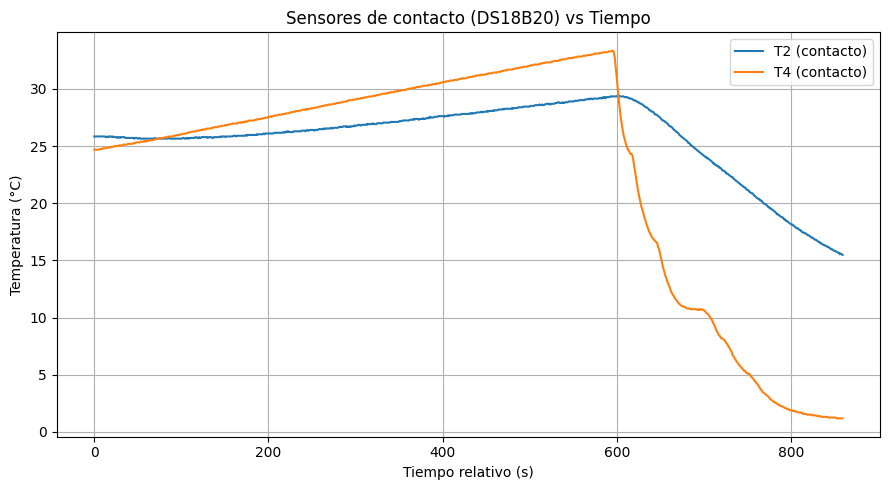

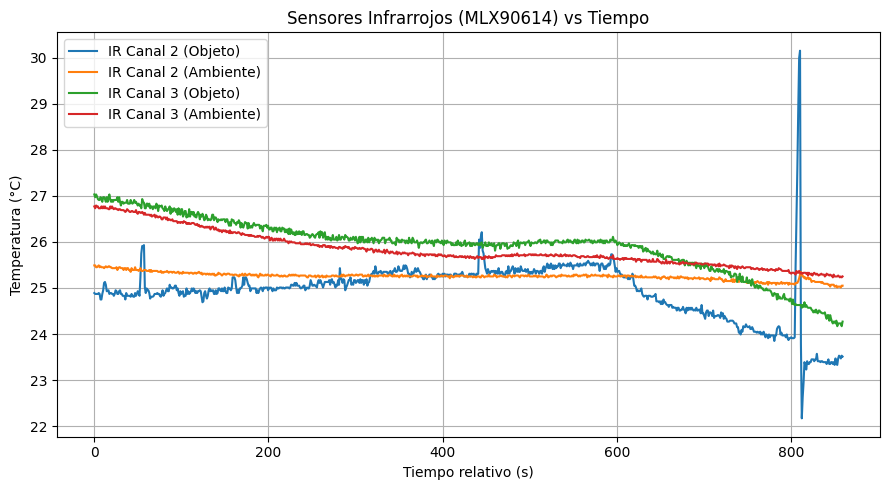

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import re

# ---------- CONFIGURACIÓN ----------
input_file = "sensores_antes_de_las_calibraciones.csv"
output_file = "prueba1_filtrado.csv"  # Archivo de salida

# ---------- LECTURA Y PROCESAMIENTO ----------
with open(input_file, "r", encoding="utf-8") as f:
    lines = f.readlines()

data = []

# Expresiones regulares para extraer los valores
pat_line1 = re.compile(
    r"(\d+:\d+:\d+\.\d+).*?->\s*(\d+)\s*ms.*?T1:\s*([\d.]+).*?T2:\s*([\d.]+).*?T3:\s*([\d.]+).*?T4:\s*([\d.]+)"
)
pat_line2 = re.compile(
    r"IR Canal 2:\s*Obj=([\d.]+).*?Amb=([\d.]+).*?IR Canal 3:\s*Obj=([\d.]+).*?Amb=([\d.]+)"
)

for i in range(len(lines)):
    m1 = pat_line1.search(lines[i])
    if m1 and i + 1 < len(lines):
        m2 = pat_line2.search(lines[i + 1])
        if m2:
            time_str, ms, T1, T2, T3, T4 = m1.groups()
            Obj2, Amb2, Obj3, Amb3 = m2.groups()
            data.append({
                "Tiempo (ms)": int(ms),
                "T1 (°C)": float(T1),
                "T2 (°C)": float(T2),
                "T3 (°C)": float(T3),
                "T4 (°C)": float(T4),
                "IR2 Obj (°C)": float(Obj2),
                "IR2 Amb (°C)": float(Amb2),
                "IR3 Obj (°C)": float(Obj3),
                "IR3 Amb (°C)": float(Amb3),
            })

# Crear DataFrame
df = pd.DataFrame(data)

# Calcular tiempo relativo en segundos
df["Tiempo relativo (s)"] = (df["Tiempo (ms)"] - df["Tiempo (ms)"].iloc[0]) / 1000

# Reordenar columnas
cols = [
    "Tiempo relativo (s)",
    "T1 (°C)", "T2 (°C)", "T3 (°C)", "T4 (°C)",
    "IR2 Obj (°C)", "IR2 Amb (°C)", "IR3 Obj (°C)", "IR3 Amb (°C)"
]
df = df[cols]

# Guardar datos filtrados
df.to_csv(output_file, index=False)
print(f"Archivo filtrado guardado como: {output_file}")

# ---------- GRAFICAR ----------
plt.figure(figsize=(9,5))
#plt.plot(df["Tiempo relativo (s)"], df["T1 (°C)"], label="T1 (contacto)")
plt.plot(df["Tiempo relativo (s)"], df["T2 (°C)"], label="T2 (contacto)")
#plt.plot(df["Tiempo relativo (s)"], df["T3 (°C)"], label="T3 (contacto)")
plt.plot(df["Tiempo relativo (s)"], df["T4 (°C)"], label="T4 (contacto)")
plt.xlabel("Tiempo relativo (s)")
plt.ylabel("Temperatura (°C)")
plt.title("Sensores de contacto (DS18B20) vs Tiempo")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

plt.figure(figsize=(9,5))
plt.plot(df["Tiempo relativo (s)"], df["IR2 Obj (°C)"], label="IR Canal 2 (Objeto)")
plt.plot(df["Tiempo relativo (s)"], df["IR2 Amb (°C)"], label="IR Canal 2 (Ambiente)")
plt.plot(df["Tiempo relativo (s)"], df["IR3 Obj (°C)"], label="IR Canal 3 (Objeto)")
plt.plot(df["Tiempo relativo (s)"], df["IR3 Amb (°C)"], label="IR Canal 3 (Ambiente)")
plt.xlabel("Tiempo relativo (s)")
plt.ylabel("Temperatura (°C)")
plt.title("Sensores Infrarrojos (MLX90614) vs Tiempo")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


Archivo filtrado guardado como: prueba2_filtrado.csv


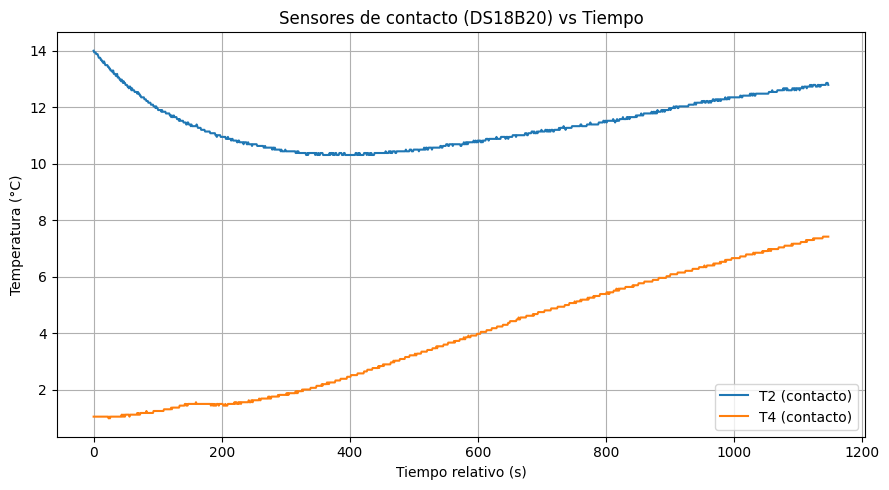

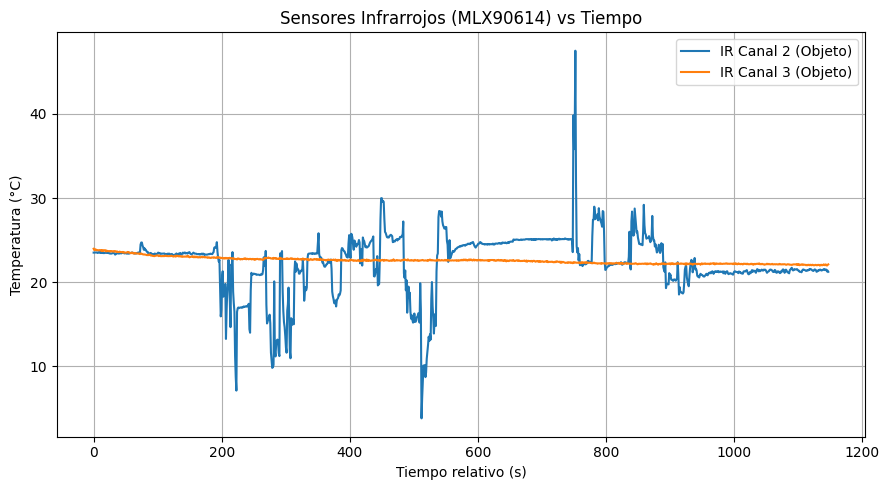

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import re

# ---------- CONFIGURACIÓN ----------
input_file = "sensores_antes_de_las_calibraciones2.csv"
output_file = "prueba2_filtrado.csv"  # Archivo de salida

# ---------- LECTURA Y PROCESAMIENTO ----------
with open(input_file, "r", encoding="utf-8") as f:
    lines = f.readlines()

data = []

# Expresiones regulares para extraer los valores
pat_line1 = re.compile(
    r"(\d+:\d+:\d+\.\d+).*?->\s*(\d+)\s*ms.*?T1:\s*([\d.]+).*?T2:\s*([\d.]+).*?T3:\s*([\d.]+).*?T4:\s*([\d.]+)"
)
pat_line2 = re.compile(
    r"IR Canal 2:\s*Obj=([\d.]+).*?Amb=([\d.]+).*?IR Canal 3:\s*Obj=([\d.]+).*?Amb=([\d.]+)"
)

for i in range(len(lines)):
    m1 = pat_line1.search(lines[i])
    if m1 and i + 1 < len(lines):
        m2 = pat_line2.search(lines[i + 1])
        if m2:
            time_str, ms, T1, T2, T3, T4 = m1.groups()
            Obj2, Amb2, Obj3, Amb3 = m2.groups()
            data.append({
                "Tiempo (ms)": int(ms),
                "T1 (°C)": float(T1),
                "T2 (°C)": float(T2),
                "T3 (°C)": float(T3),
                "T4 (°C)": float(T4),
                "IR2 Obj (°C)": float(Obj2),
                "IR2 Amb (°C)": float(Amb2),
                "IR3 Obj (°C)": float(Obj3),
                "IR3 Amb (°C)": float(Amb3),
            })

# Crear DataFrame
df = pd.DataFrame(data)

# Calcular tiempo relativo en segundos
df["Tiempo relativo (s)"] = (df["Tiempo (ms)"] - df["Tiempo (ms)"].iloc[0]) / 1000

# Reordenar columnas
cols = [
    "Tiempo relativo (s)",
    "T1 (°C)", "T2 (°C)", "T3 (°C)", "T4 (°C)",
    "IR2 Obj (°C)", "IR2 Amb (°C)", "IR3 Obj (°C)", "IR3 Amb (°C)"
]
df = df[cols]

# Guardar datos filtrados
df.to_csv(output_file, index=False)
print(f"Archivo filtrado guardado como: {output_file}")

# ---------- GRAFICAR ----------
plt.figure(figsize=(9,5))
#plt.plot(df["Tiempo relativo (s)"], df["T1 (°C)"], label="T1 (contacto)")
plt.plot(df["Tiempo relativo (s)"], df["T2 (°C)"], label="T2 (contacto)")
#plt.plot(df["Tiempo relativo (s)"], df["T3 (°C)"], label="T3 (contacto)")
plt.plot(df["Tiempo relativo (s)"], df["T4 (°C)"], label="T4 (contacto)")
plt.xlabel("Tiempo relativo (s)")
plt.ylabel("Temperatura (°C)")
plt.title("Sensores de contacto (DS18B20) vs Tiempo")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

plt.figure(figsize=(9,5))
plt.plot(df["Tiempo relativo (s)"], df["IR2 Obj (°C)"], label="IR Canal 2 (Objeto)")
#plt.plot(df["Tiempo relativo (s)"], df["IR2 Amb (°C)"], label="IR Canal 2 (Ambiente)")
plt.plot(df["Tiempo relativo (s)"], df["IR3 Obj (°C)"], label="IR Canal 3 (Objeto)")
#plt.plot(df["Tiempo relativo (s)"], df["IR3 Amb (°C)"], label="IR Canal 3 (Ambiente)")
plt.xlabel("Tiempo relativo (s)")
plt.ylabel("Temperatura (°C)")
plt.title("Sensores Infrarrojos (MLX90614) vs Tiempo")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


Archivo filtrado guardado como: prueba3_filtrado.csv


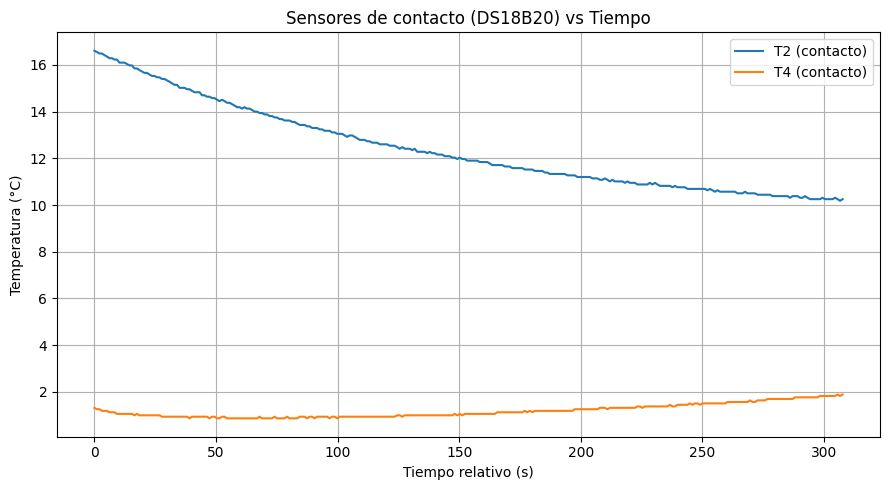

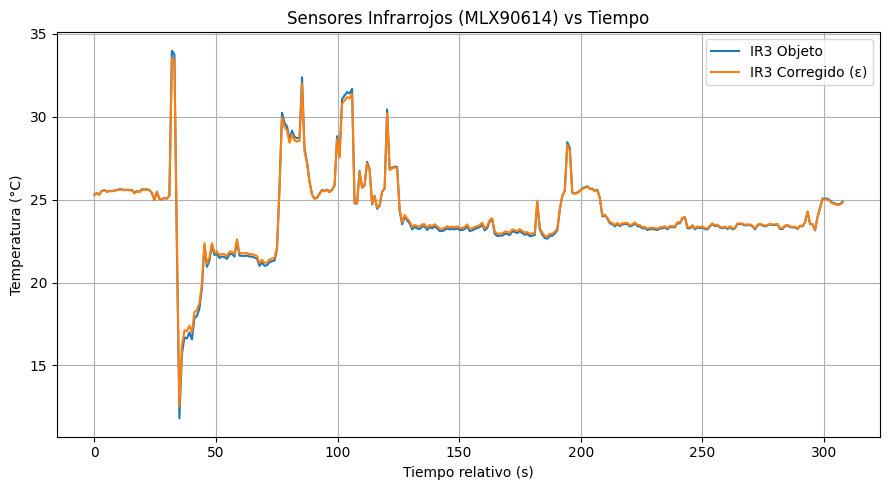

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import re

# ---------- CONFIGURACIÓN ----------
input_file = "con_carcasa.csv"
output_file = "prueba3_filtrado.csv"

# ---------- LECTURA Y PROCESAMIENTO ----------
with open(input_file, "r", encoding="utf-8") as f:
    lines = f.readlines()

data = []

# Expresiones regulares
pat_line1 = re.compile(
    r"(\d+:\d+:\d+\.\d+).*?->\s*(\d+)\s*ms.*?T1:\s*([\d.]+).*?T2:\s*([\d.]+).*?T3:\s*([\d.]+).*?T4:\s*([\d.]+)"
)
pat_line2 = re.compile(
    r"IR Canal 2:\s*Obj=([\d.]+).*?Amb=([\d.]+).*?Obj_corr=([\d.]+).*?"
    r"IR Canal 3:\s*Obj=([\d.]+).*?Amb=([\d.]+).*?Obj_corr=([\d.]+)"
)

for i in range(len(lines)):
    m1 = pat_line1.search(lines[i])
    if m1 and i + 1 < len(lines):
        m2 = pat_line2.search(lines[i + 1])
        if m2:
            time_str, ms, T1, T2, T3, T4 = m1.groups()
            Obj2, Amb2, Obj_corr2, Obj3, Amb3, Obj_corr3 = m2.groups()
            data.append({
                "Tiempo (ms)": int(ms),
                "T1 (°C)": float(T1),
                "T2 (°C)": float(T2),
                "T3 (°C)": float(T3),
                "T4 (°C)": float(T4),
                "IR2 Obj (°C)": float(Obj2),
                "IR2 Amb (°C)": float(Amb2),
                "IR2 Corr (°C)": float(Obj_corr2),
                "IR3 Obj (°C)": float(Obj3),
                "IR3 Amb (°C)": float(Amb3),
                "IR3 Corr (°C)": float(Obj_corr3),
            })

# Crear DataFrame
df = pd.DataFrame(data)

# Calcular tiempo relativo en segundos
df["Tiempo relativo (s)"] = (df["Tiempo (ms)"] - df["Tiempo (ms)"].iloc[0]) / 1000

# Reordenar columnas
cols = [
    "Tiempo relativo (s)",
    "T1 (°C)", "T2 (°C)", "T3 (°C)", "T4 (°C)",
    "IR2 Obj (°C)", "IR2 Amb (°C)", "IR2 Corr (°C)",
    "IR3 Obj (°C)", "IR3 Amb (°C)", "IR3 Corr (°C)"
]
df = df[cols]

# Guardar CSV filtrado
df.to_csv(output_file, index=False)
print(f"Archivo filtrado guardado como: {output_file}")

# ---------- GRAFICAR ----------
plt.figure(figsize=(9,5))
#plt.plot(df["Tiempo relativo (s)"], df["T1 (°C)"], label="T1 (contacto)")
plt.plot(df["Tiempo relativo (s)"], df["T2 (°C)"], label="T2 (contacto)")
#plt.plot(df["Tiempo relativo (s)"], df["T3 (°C)"], label="T3 (contacto)")
plt.plot(df["Tiempo relativo (s)"], df["T4 (°C)"], label="T4 (contacto)")
plt.xlabel("Tiempo relativo (s)")
plt.ylabel("Temperatura (°C)")
plt.title("Sensores de contacto (DS18B20) vs Tiempo")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

plt.figure(figsize=(9,5))
#plt.plot(df["Tiempo relativo (s)"], df["IR2 Obj (°C)"], label="IR2 Objeto")
#plt.plot(df["Tiempo relativo (s)"], df["IR2 Amb (°C)"], label="IR2 Ambiente")
#plt.plot(df["Tiempo relativo (s)"], df["IR2 Corr (°C)"], label="IR2 Corregido (ε)")
plt.plot(df["Tiempo relativo (s)"], df["IR3 Obj (°C)"], label="IR3 Objeto")
#plt.plot(df["Tiempo relativo (s)"], df["IR3 Amb (°C)"], label="IR3 Ambiente")
plt.plot(df["Tiempo relativo (s)"], df["IR3 Corr (°C)"], label="IR3 Corregido (ε)")
plt.xlabel("Tiempo relativo (s)")
plt.ylabel("Temperatura (°C)")
plt.title("Sensores Infrarrojos (MLX90614) vs Tiempo")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


Archivo filtrado guardado como: prueba4_filtrado.csv


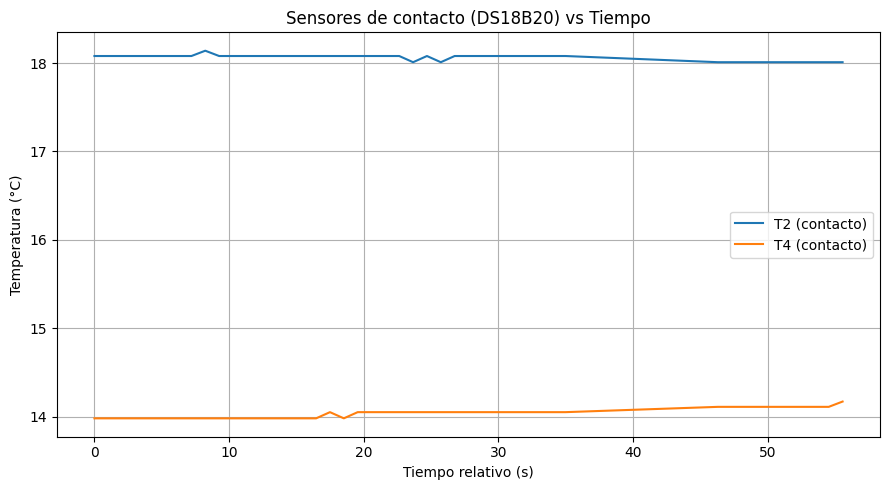

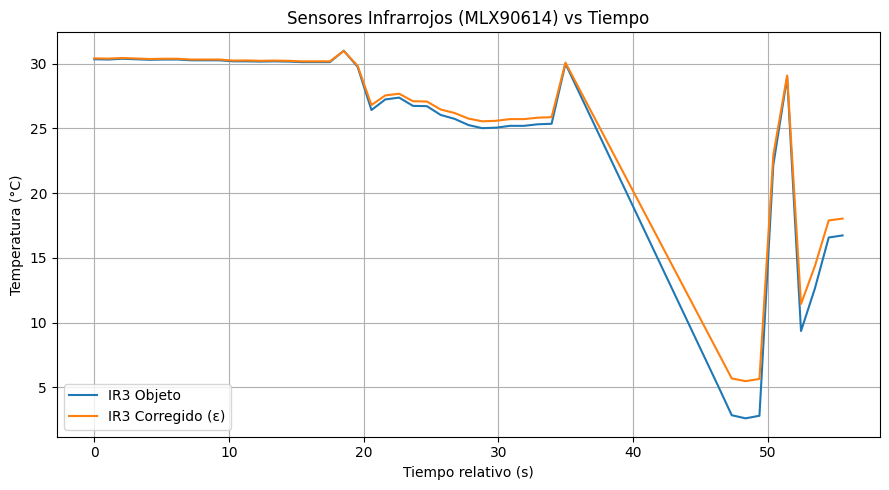

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import re

# ---------- CONFIGURACIÓN ----------
input_file = "con_carcasa_y_sin_carcasa.csv"
output_file = "prueba4_filtrado.csv"

# ---------- LECTURA Y PROCESAMIENTO ----------
with open(input_file, "r", encoding="utf-8") as f:
    lines = f.readlines()

data = []

# Expresiones regulares
pat_line1 = re.compile(
    r"(\d+:\d+:\d+\.\d+).*?->\s*(\d+)\s*ms.*?T1:\s*([\d.]+).*?T2:\s*([\d.]+).*?T3:\s*([\d.]+).*?T4:\s*([\d.]+)"
)
pat_line2 = re.compile(
    r"IR Canal 2:\s*Obj=([\d.]+).*?Amb=([\d.]+).*?Obj_corr=([\d.]+).*?"
    r"IR Canal 3:\s*Obj=([\d.]+).*?Amb=([\d.]+).*?Obj_corr=([\d.]+)"
)

for i in range(len(lines)):
    m1 = pat_line1.search(lines[i])
    if m1 and i + 1 < len(lines):
        m2 = pat_line2.search(lines[i + 1])
        if m2:
            time_str, ms, T1, T2, T3, T4 = m1.groups()
            Obj2, Amb2, Obj_corr2, Obj3, Amb3, Obj_corr3 = m2.groups()
            data.append({
                "Tiempo (ms)": int(ms),
                "T1 (°C)": float(T1),
                "T2 (°C)": float(T2),
                "T3 (°C)": float(T3),
                "T4 (°C)": float(T4),
                "IR2 Obj (°C)": float(Obj2),
                "IR2 Amb (°C)": float(Amb2),
                "IR2 Corr (°C)": float(Obj_corr2),
                "IR3 Obj (°C)": float(Obj3),
                "IR3 Amb (°C)": float(Amb3),
                "IR3 Corr (°C)": float(Obj_corr3),
            })

# Crear DataFrame
df = pd.DataFrame(data)

# Calcular tiempo relativo en segundos
df["Tiempo relativo (s)"] = (df["Tiempo (ms)"] - df["Tiempo (ms)"].iloc[0]) / 1000

# Reordenar columnas
cols = [
    "Tiempo relativo (s)",
    "T1 (°C)", "T2 (°C)", "T3 (°C)", "T4 (°C)",
    "IR2 Obj (°C)", "IR2 Amb (°C)", "IR2 Corr (°C)",
    "IR3 Obj (°C)", "IR3 Amb (°C)", "IR3 Corr (°C)"
]
df = df[cols]

# Guardar CSV filtrado
df.to_csv(output_file, index=False)
print(f"Archivo filtrado guardado como: {output_file}")

# ---------- GRAFICAR ----------
plt.figure(figsize=(9,5))
#plt.plot(df["Tiempo relativo (s)"], df["T1 (°C)"], label="T1 (contacto)")
plt.plot(df["Tiempo relativo (s)"], df["T2 (°C)"], label="T2 (contacto)")
#plt.plot(df["Tiempo relativo (s)"], df["T3 (°C)"], label="T3 (contacto)")
plt.plot(df["Tiempo relativo (s)"], df["T4 (°C)"], label="T4 (contacto)")
plt.xlabel("Tiempo relativo (s)")
plt.ylabel("Temperatura (°C)")
plt.title("Sensores de contacto (DS18B20) vs Tiempo")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

plt.figure(figsize=(9,5))
#plt.plot(df["Tiempo relativo (s)"], df["IR2 Obj (°C)"], label="IR2 Objeto")
#plt.plot(df["Tiempo relativo (s)"], df["IR2 Amb (°C)"], label="IR2 Ambiente")
#plt.plot(df["Tiempo relativo (s)"], df["IR2 Corr (°C)"], label="IR2 Corregido (ε)")
plt.plot(df["Tiempo relativo (s)"], df["IR3 Obj (°C)"], label="IR3 Objeto")
#plt.plot(df["Tiempo relativo (s)"], df["IR3 Amb (°C)"], label="IR3 Ambiente")
plt.plot(df["Tiempo relativo (s)"], df["IR3 Corr (°C)"], label="IR3 Corregido (ε)")
plt.xlabel("Tiempo relativo (s)")
plt.ylabel("Temperatura (°C)")
plt.title("Sensores Infrarrojos (MLX90614) vs Tiempo")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
